# ADVANCED NOTEBOOK4 - Adam NOWAK

### Analysis of E-commerce dataset from Kaggle
https://www.kaggle.com/datasets/carrie1/ecommerce-data/data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers." 

We have 8 columns which contains InvoiceNo, StockCode, Description (product name), quantity, invoiceDate, UnitPrice (product price), CustomerID, CustomerCountry. 





In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Cleaning data

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Maybe we will need to delete rows which nulls, but for now they are ok. 

In [5]:
#droping useless columns 
df = df.dropna(subset=['Description'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
len(df)

530104

In [6]:
df.describe() 
#of course customerId columns here is useless

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [7]:
df['Total_sales'] = df['Quantity'] * df['UnitPrice']
sales_by_country = df.groupby('Country')['Total_sales'].sum().sort_values(ascending=False)
sales_by_country

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

### Finding closest neighbour 

In [23]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer

df_sample = df.sample(200, random_state=40)

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

#nearestneigghbour model 
nn = NearestNeighbors(n_neighbors=2, metric='cosine')
nn.fit(description_vectors_array)

#finding closest neighbours 
distances, indices = nn.kneighbors(description_vectors_array)

df_neighbors = pd.DataFrame({
    'Description (Product)': [i for i in range(len(df_sample))],
    'Closest neighbour' : [indices[i][1] for i in range(len(indices))],
    'Distances' : [distances[i][1] for i in range(len(distances))],
})

df_neighbors


,Description (Product),Closest neighbour,Distances
0,0,36,0.452277
1,1,131,0.552786
2,2,121,0.422650
3,3,26,0.646447
4,4,50,0.591752
...,...,...,...
195,195,76,0.591752
196,196,1,1.000000
197,197,155,0.483602
198,198,152,0.500000


Lowest Distances (cosine metric) means that descriptions are closer to each other. (0 means that they're identical). It is useful to recommendation system for buyers. 

In [32]:
from sklearn.metrics import pairwise_distances

df_sample = df.sample(200, random_state=40)

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

dist = pairwise_distances(description_vectors_array, metric='euclidean')

df_dist_neighbors = pd.DataFrame(dist,
                                 columns=df_sample['Description'].values,
                                 index=df_sample['Description'].values)

df_dist_neighbors.head(10) #only 10 rows 



,SET OF 4 FAIRY CAKE PLACEMATS,CHOCOLATE 3 WICK MORRIS BOX CANDLE,GREEN ROUND COMPACT MIRROR,CLASSIC METAL BIRDCAGE PLANT HOLDER,LARGE ZINC HEART WALL ORGANISER,RED RETROSPOT CUP,LUNCH BAG PAISLEY PARK,BAG 125g SWIRLY MARBLES,RETROSPOT CIGAR BOX MATCHES,GARDENERS KNEELING PAD KEEP CALM,...,ALARM CLOCK BAKELIKE RED,HOME SWEET HOME MUG,EDWARDIAN PARASOL PINK,SET OF 12 MINI LOAF BAKING CASES,WOODLAND CHARLOTTE BAG,TEA TIME PARTY BUNTING,HEARTS STICKERS,SILVER GLITTER FLOWER VOTIVE HOLDER,WALL ART ONLY ONE PERSON,"METAL SIGN,CUPCAKE SINGLE HOOK"
SET OF 4 FAIRY CAKE PLACEMATS,0.000000,3.000000,2.828427,3.000000,3.000000,2.828427,3.000000,2.449490,2.645751,2.645751,...,2.449490,3.162278,2.645751,2.449490,2.828427,2.828427,2.236068,2.828427,2.645751,3.000000
CHOCOLATE 3 WICK MORRIS BOX CANDLE,3.000000,0.000000,2.645751,2.828427,2.828427,2.645751,2.828427,2.236068,2.000000,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.645751,2.645751,2.000000,2.645751,2.449490,2.828427
GREEN ROUND COMPACT MIRROR,2.828427,2.645751,0.000000,2.645751,2.645751,2.449490,2.645751,2.000000,2.236068,2.236068,...,2.000000,2.828427,2.236068,2.828427,2.449490,2.449490,1.732051,2.449490,2.236068,2.645751
CLASSIC METAL BIRDCAGE PLANT HOLDER,3.000000,2.828427,2.645751,0.000000,2.828427,2.645751,2.828427,2.236068,2.449490,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.645751,2.645751,2.000000,2.236068,2.449490,2.449490
LARGE ZINC HEART WALL ORGANISER,3.000000,2.828427,2.645751,2.828427,0.000000,2.645751,2.828427,2.236068,2.449490,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.645751,2.645751,2.000000,2.645751,2.000000,2.828427
RED RETROSPOT CUP,2.828427,2.645751,2.449490,2.645751,2.645751,0.000000,2.645751,2.000000,1.732051,2.236068,...,1.414214,2.828427,2.236068,2.828427,2.449490,2.449490,1.732051,2.449490,2.236068,2.645751
LUNCH BAG PAISLEY PARK,3.000000,2.828427,2.645751,2.828427,2.828427,2.645751,0.000000,1.732051,2.449490,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.236068,2.645751,2.000000,2.645751,2.449490,2.828427
BAG 125g SWIRLY MARBLES,2.449490,2.236068,2.000000,2.236068,2.236068,2.000000,1.732051,0.000000,1.732051,1.732051,...,1.414214,2.449490,1.732051,2.449490,1.414214,2.000000,1.000000,2.000000,1.732051,2.236068
RETROSPOT CIGAR BOX MATCHES,2.645751,2.000000,2.236068,2.449490,2.449490,1.732051,2.449490,1.732051,0.000000,2.000000,...,1.732051,2.645751,2.000000,2.645751,2.236068,2.236068,1.414214,2.236068,2.000000,2.449490
GARDENERS KNEELING PAD KEEP CALM,2.645751,2.449490,2.236068,2.449490,2.449490,2.236068,2.449490,1.732051,2.000000,0.000000,...,1.732051,2.645751,2.000000,2.645751,2.236068,2.236068,1.414214,2.236068,2.000000,2.449490


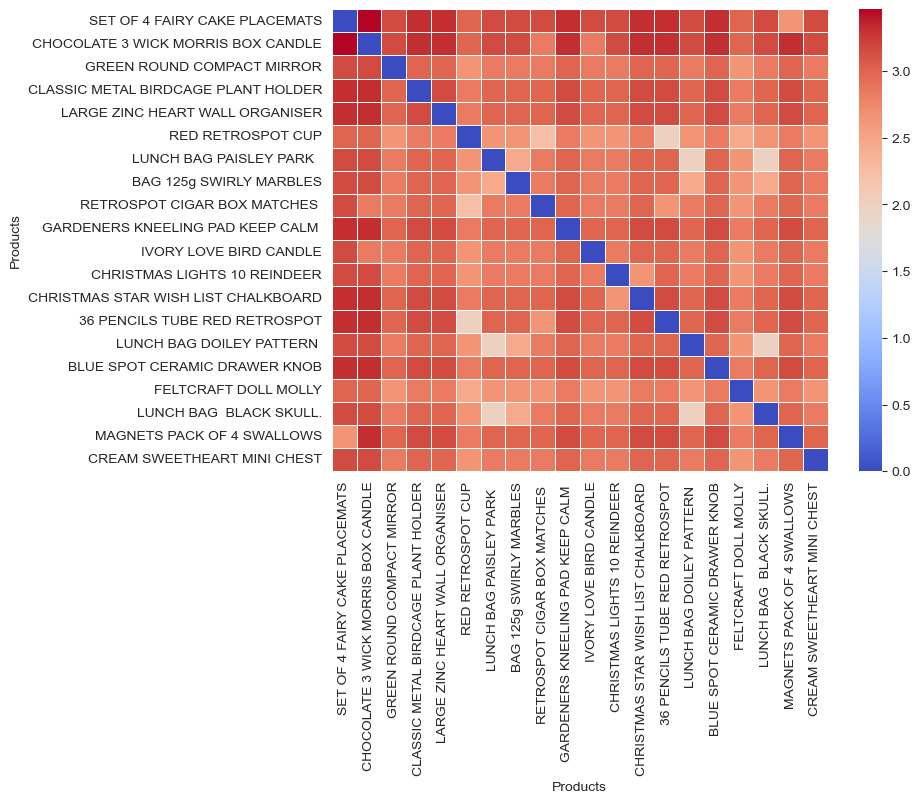

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sample_Limited = df_sample.head(20)

description_vectors = vectorizer.fit_transform(df_sample_Limited['Description'])
description_vectors_array = description_vectors.toarray()

dist = pairwise_distances(description_vectors_array, metric='euclidean')

df_dist_neighbors = pd.DataFrame(dist,
                                 columns=df_sample_Limited ['Description'].values,
                                 index=df_sample_Limited['Description'].values)

plt.figure(figsize=(8, 6))
sns.heatmap(df_dist_neighbors, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('Products')
plt.ylabel('Products')
plt.show()


Lowest value means products are closer. And this time I used euclidean metric and pairwise_distances.

### Scaling up k-NN search by storing data in a KD-tree. 

In [41]:
df_sample = df.sample(200, random_state=40)

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

#creating kd_tree as a data structure
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', metric='euclidean')
nn.fit(description_vectors_array)

distances, indices = nn.kneighbors(description_vectors_array)

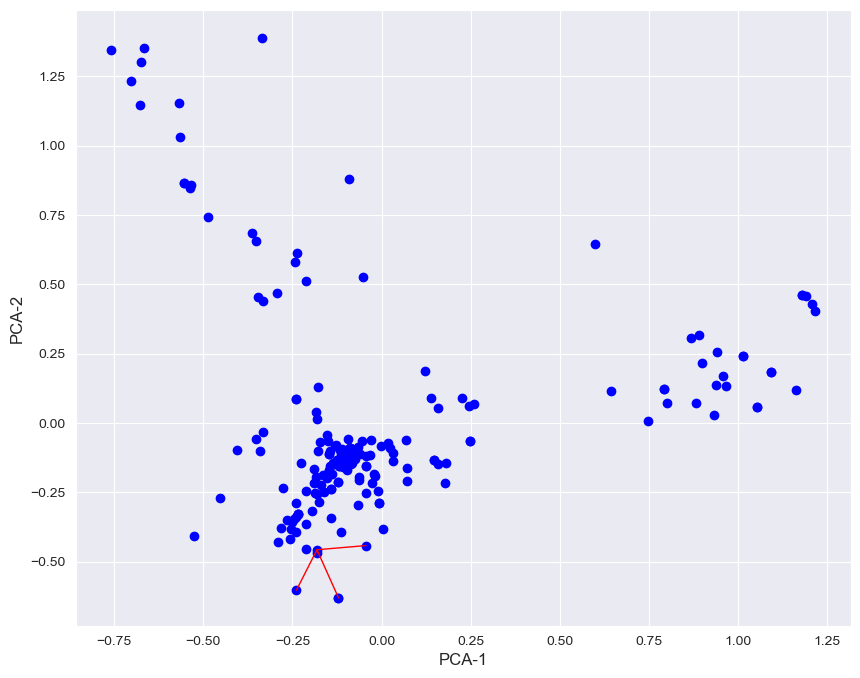

In [54]:
import numpy as np
from sklearn.decomposition import PCA

#redukcja do 2 wymiarów  - sluzy do tego aby reprezentowac dane w 2 wymiarach jak najlepiej 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(description_vectors_array)

fig, ax = plt.subplots(figsize=(10, 8))

'''
reduced_data[:, 0], reduced_data[:, 1] - współrzedne produktów w 2 wymiarach, 
first axis PCA1 - wyjaśnia: największą zmienność w danych. 
Kiedy przeprowadzamy PCA na naszych danych, pierwsza składowa główna jest kierunkiem, 
w którym produkty różnią się najbardziej, gdy spojrzymy na wszystkie ich cechy.

second axis PCA2 - drugą największą zmienność w danych, ale po uwzględnieniu zmienności, którą już wyjaśniała pierwsza składowa.
jest prostopadła do PCA1 i uwzglednia to co PCA1 nie uwzgledniła 

'''
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', marker='o')

random_product_index = np.random.randint(0, len(reduced_data))
products_cords = reduced_data[random_product_index] #choosing random point to draw line to his closest neighbours 
nearest_neighbors_indices = indices[random_product_index][1:5] #4 closest friends 

#drawing lines between 4 closest friends 
for neighbor_index in nearest_neighbors_indices:
    neighbor_coords = reduced_data[neighbor_index] #closest friends cords 
    ax.plot([products_cords[0], neighbor_coords[0]], 
            [products_cords[1], neighbor_coords[1]], 
            'r-', lw=1)  #r- : linia ciagła i czerwona

ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)

plt.show()

On the plot presented above we can observe: 

1. Closer points are to each other more similar they are. Their qualities are more similar. 
2. The red lines drawn between the random product and its 4 closest neighbors show the relationships between similar products. Products connected by shorter lines are more similar to each other in terms of their features
